In [27]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as plt
import pandas as pd
import numpy as np
import os


def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

def _savefig(fig,ax,name='',title='',fts=10,xsize=(10,10),zmax=None):
    plt.xticks(size=fts)
    plt.yticks(size=fts)
    plt.title(title)
    fig.set_size_inches(xsize)
    fig.savefig(name + '.png')#,dpi='figure')
    fig.savefig(name + '.pdf', dpi=1000)
    plt.close()
    
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} r)".format(pct, absolute)

def _mkdir(path):
    print('path : ',path)
    print(os.path.exists(path))
    if not(os.path.exists(path)):
      os.mkdir(path)

Semestre = 3 #5 #1
Sem_ch   = str(Semestre)

#For S6 only
complementaire = True

pathini = '/Users/florentbrient/'
pathini = '/home/fbrient/'
path    = pathini+'Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S'+Sem_ch+'/'

fileadd = []
file    = 'Responses_S'+Sem_ch+'_2022_2023.xlsx' #'Sondage UE Sciences de la Terre - Semestre '+str(Semestre)+'.csv'


#if Semestre == 4:
#  file  = 'Sondage UE Sciences de la Terre - Semestre '+str(Semestre)+' - v2.csv'
#elif Semestre == 5: 
#  fileadd   = []
  #fileadd   = 'Sondage UE Sciences de la Terre - Ressources.csv'
  #fileadd   = 'Sondage UE Sciences de la Terre - Océanographie.csv'
#  fileadd   = 'Sondage UE Sciences de la Terre - Biodiversité et Paléobiodiversité.csv'
   #[ 'Sondage UE Sciences de la Terre - Ressources.csv'
             #,'Sondage UE Sciences de la Terre - Océanographie.csv'
             #,'Sondage UE Sciences de la Terre - Biodiversité et Paléobiodiversité.csv']
if Semestre == 6 and complementaire: 
    file   = 'Responses_S'+Sem_ch+'_2021_2022_complementaires.xlsx'

suffix = ''
#if len(fileadd)>0:
#    suffix = '_'+fileadd.split(' ')[-1].split('.')[0] 
#    file   = fileadd
#print(file,fileadd,suffix)

file   = path+file
print('file : ',file)

pathfig0 = path #'/Users/florentbrient/Dropbox/Enseignements/2020_2021/Responsable_Eval/Sondage/'
pathfig  = pathfig0+'d_figures/'
_mkdir(pathfig)

#df1    = pd.read_csv(file)
df1    = pd.read_excel(file)
#print(type(df1))
if len(fileadd)>0:
    for tmp in fileadd:
        print(tmp)
        df_tmp = pd.read_excel(path+tmp)
        #print(df_tmp)
        df1 = pd.concat([df1,df_tmp], axis=1) #, sort=False )#ignore_index=True) #, sort=False)
#df_eng = pd.read_excel('translate_FR.xlsx', header=1,encoding='latin1')
#df_eng = df_eng.set_axis(df_fr.columns.values.tolist(),axis='columns')
#df     = df_fr.append(df_eng, ignore_index=True, sort=False)

df     = df1
#print(df)

questions=df.columns.values
print(questions)



file :  /home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/Responses_S3_2022_2023.xlsx
path :  /home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/
True
['Horodateur' 'Quelle formation suivez-vous?'
 "Avez-vous suivi l'UE Terrain 1 - Normandie (LU2ST303) ou l'UE  Terrain 1 -  Hydrochimie (LU2ST352) ?"
 'Quel Terrain avez-vous suivi?'
 'Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]'
 'Que diriez-vous des objectifs de cette UE ? [Vous les avez compris]'
 "Contenu de l'UE [Le cours est bien adapté à vos connaissances et compétences préalables.]"
 "Contenu de l'UE [La charge de travail est adéquate par rapport au nombre de crédits ECTS]"
 "Contenu de l'UE [Les modalités d’évaluation sont adaptées avec les objectifs de l’UE]"
 "Contenu de l'UE [Les enseignements de cette UE vous ont intéressé.]"
 "Le lien entre l'UE Terrain et les autres enseignements du semestre vous parait-il?"
 'Les documents de cette UE vous semblent : 

In [28]:
# Formation

pies     = [1]
New_name = ['Formation?']

c1='#1f77b4' #blue
c2='red' #green
n=4
colors2 = [colorFader(c1,c2,x/2)for x in range(2)]
colors4 = [colorFader(c1,c2,x/4)for x in range(4)]

#print(df[questions[pies[0]]])
formation = df[questions[pies[0]]]#.squeeze(axis=1)
if len(formation.shape)>1:
    print(formation.shape)
    print(formation.iloc[:,[0]])
    formation=formation.iloc[:,[0]].squeeze()
print(formation.shape)

print(type(formation))
labels0 = formation.unique()
print(labels0)
#['Majeure' 'Mineure Geosciences' 'Monodisciplinaire Sciences de la Terre'
# 'Bi-disciplinaire : Biologie - Mineure Sciences de la Terre (MEEF)']
    

colors  = ['royalblue','red','gold','green','purple','cyan']
colors_save = colors

figsize = (8, 5)

for ij,nbpie in enumerate(pies): 
    fig, ax = plt.subplots(1,figsize=figsize)

    #data = df[questions[nbpie]].value_counts()#normalize=True)
    data = formation.value_counts()#normalize=True)
    print(data)
    for ik in data.index:
       data = data.rename(index={ik:ik.split(' ')[0]})
    print(data)
    
    labels  = data.index #[ij.split(' ')[0] for ij in labels0 if ij in data.index]  
    print(labels,data.index)#,dcolors)
    
        
    gcolors = dict()
    keys    = labels
    for ik,key in enumerate(keys):
        print(ik, key)
        gcolors[key]=colors[ik]
    print(gcolors)
    labels = [ik for ik in gcolors if ik in data.index]
    data   = data.reindex(labels)
    print(labels)
    
    wedges, texts, autotexts = ax.pie(data,labels=labels
                                  ,autopct=lambda pct: func(pct, data)
                                  ,colors=[gcolors[i] for i in data.index]
                                  ,textprops=dict(color="k"),startangle=90
                                  ,pctdistance=0.7, labeldistance=1.2
                                 )
    print(ax.xaxis.get_label())
    ax.legend(wedges, labels,
          loc="upper right",
          bbox_to_anchor=(1, 1, 0.5, -0.5))
          #title=questions[1],
    plt.setp(autotexts, size=10, weight="bold")

    title = New_name[ij]
    ax.set_title(title)
    
    name_file = pathfig+title.split('?')[0]+'_Semestre'+Sem_ch+suffix
    print(title,name_file)
#plt.show()
    _savefig(fig,ax,title=title,name=name_file,xsize=figsize)


(47,)
<class 'pandas.core.series.Series'>
['Majeure' 'Mineure' 'Monodisciplinaire Sciences de la Terre'
 'Double Majeure' 'Licence pro RQEE' 'L4']
Monodisciplinaire Sciences de la Terre    16
Mineure                                   12
Majeure                                    6
Double Majeure                             6
Licence pro RQEE                           4
L4                                         3
Name: Quelle formation suivez-vous?, dtype: int64
Monodisciplinaire    16
Mineure              12
Majeure               6
Double                6
Licence               4
L4                    3
Name: Quelle formation suivez-vous?, dtype: int64
Index(['Monodisciplinaire', 'Mineure', 'Majeure', 'Double', 'Licence', 'L4'], dtype='object') Index(['Monodisciplinaire', 'Mineure', 'Majeure', 'Double', 'Licence', 'L4'], dtype='object')
0 Monodisciplinaire
1 Mineure
2 Majeure
3 Double
4 Licence
5 L4
{'Monodisciplinaire': 'royalblue', 'Mineure': 'red', 'Majeure': 'gold', 'Double': 'gree

In [29]:
#Find UEs
UEs = [(ij,question.replace(' ?','').split(' ')[-1]) for ij,question in enumerate(questions) if 'Avez-vous suivi' in question]
print(UEs)

# Make a selection (Subset of the poll)
#said_yes = df[df[questions[2]] == 'Oui']
#print(questions[5],said_yes)

subset = False
if subset:
  # Impose this selection
    pathfig = pathfig+'d_subset/'
    df      = said_yes


[(2, '(LU2ST352)'), (14, 'LU2ST321)?'), (25, '(LU2ST032)'), (36, '(LU2ST035)'), (47, '(LU2ST302)'), (58, '(LU2ST304)'), (69, '(LU2ST031)'), (80, '(LU2ST033)'), (91, '(LU2ST034)'), (102, '(LU2ST353)'), (113, '(LU2ST354)')]


[2, 14, 25, 36, 47, 58, 69, 80, 91, 102, 113] ['LU2ST352', 'LU2ST321', 'LU2ST032', 'LU2ST035', 'LU2ST302', 'LU2ST304', 'LU2ST031', 'LU2ST033', 'LU2ST034', 'LU2ST353', 'LU2ST354']
['cohérence', 'lien entre']
18
UE :  LU2ST352
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST352/
path :  /home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST352/
True
0 0     Oui
1     Oui
2     Oui
3     Oui
4     Oui
5     Oui
6     Oui
7     Oui
8     Oui
9     Oui
10    Oui
11    Oui
12    Oui
13    Oui
14    Oui
15    Oui
16    Oui
17    Oui
18    Oui
19    Oui
20    Oui
21    Non
22    Oui
23    Oui
24    Non
25    Oui
26    Oui
27    Oui
28    Oui
29    Oui
30    Oui
31    Oui
32    Non
33    Oui
34    Oui
35    Oui
36    Oui
37    Non
38    Oui
39    Oui
40    Oui
41    Oui
42    Oui
43    Oui
44    Oui
45    Oui
46    Oui
Name: Avez-vous suivi l'UE Terrain 1 - Normandie (LU2ST303) ou l'UE  Terrain 1 -  Hydrochimie (LU2ST352) ?, dtyp

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


3 0     Non
1     Oui
2     Oui
3     Oui
4     Oui
5     Oui
6     Oui
7     Oui
8     Oui
9     Oui
10    Oui
11    Oui
12    Oui
13    Oui
14    Oui
15    Oui
16    Oui
17    Oui
18    Oui
19    Oui
20    Oui
21    NaN
22    Oui
23    Oui
24    NaN
25    Oui
26    Oui
27    Oui
28    Oui
29    Oui
30    Oui
31    Oui
32    NaN
33    Oui
34    Oui
35    Oui
36    Non
37    NaN
38    Oui
39    Oui
40    Oui
41    Oui
42    Oui
43    Oui
44    Oui
45    Oui
46    Oui
Name: Que diriez-vous des objectifs de cette UE ? [Vous les avez compris], dtype: object
LU2ST352 2 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Vous les avez compris]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST352/Question_3
4 0      Plutôt pas d'accord
1          Plutôt d'accord
2          Plutôt d'accord
3     Tout à fait d'accord
4          Plutôt d'accord
5     Tout à fait d'accord
6     Tout à fait d'accord
7 

9 0      Plutôt pas d'accord
1          Plutôt d'accord
2          Plutôt d'accord
3     Tout à fait d'accord
4      Plutôt pas d'accord
5          Plutôt d'accord
6      Plutôt pas d'accord
7          Plutôt d'accord
8     Tout à fait d'accord
9      Plutôt pas d'accord
10         Plutôt d'accord
11     Plutôt pas d'accord
12    Tout à fait d'accord
13         Plutôt d'accord
14    Pas du tout d'accord
15     Plutôt pas d'accord
16    Tout à fait d'accord
17         Plutôt d'accord
18    Pas du tout d'accord
19         Plutôt d'accord
20         Plutôt d'accord
21                     NaN
22    Tout à fait d'accord
23         Plutôt d'accord
24                     NaN
25    Tout à fait d'accord
26     Plutôt pas d'accord
27     Plutôt pas d'accord
28    Pas du tout d'accord
29         Plutôt d'accord
30         Plutôt d'accord
31    Tout à fait d'accord
32                     NaN
33         Plutôt d'accord
34     Plutôt pas d'accord
35     Plutôt pas d'accord
36    Tout à fait d'accord

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


14 0     Oui
1     Oui
2     Oui
3     Oui
4     Oui
5     Oui
6     Oui
7     Oui
8     Oui
9     Oui
10    Oui
11    Oui
12    Oui
13    Oui
14    Oui
15    Oui
16    Oui
17    Oui
18    Oui
19    Oui
20    Oui
21    NaN
22    Oui
23    Non
24    Oui
25    Oui
26    Oui
27    Oui
28    Oui
29    Oui
30    Oui
31    Oui
32    NaN
33    Oui
34    Oui
35    Oui
36    Oui
37    NaN
38    Oui
39    Oui
40    Oui
41    Oui
42    Oui
43    Oui
44    Oui
45    Oui
46    Oui
Name: Que diriez-vous des objectifs de cette UE ? [Vous les avez compris].1, dtype: object
LU2ST352 2 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Vous les avez compris]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST352/Question_14
15 0     Tout à fait d'accord
1          Plutôt d'accord
2      Plutôt pas d'accord
3     Tout à fait d'accord
4          Plutôt d'accord
5     Tout à fait d'accord
6     Tout à fait d'acco

3 0     Tout à fait d'accord
1          Plutôt d'accord
2      Plutôt pas d'accord
3     Tout à fait d'accord
4          Plutôt d'accord
5     Tout à fait d'accord
6     Tout à fait d'accord
7     Tout à fait d'accord
8     Tout à fait d'accord
9     Tout à fait d'accord
10    Tout à fait d'accord
11    Tout à fait d'accord
12    Tout à fait d'accord
13    Tout à fait d'accord
14         Plutôt d'accord
15         Plutôt d'accord
16    Tout à fait d'accord
17         Plutôt d'accord
18    Tout à fait d'accord
19    Tout à fait d'accord
20    Tout à fait d'accord
21                     NaN
22    Tout à fait d'accord
23         Plutôt d'accord
24    Tout à fait d'accord
25         Plutôt d'accord
26    Tout à fait d'accord
27         Plutôt d'accord
28    Tout à fait d'accord
29         Plutôt d'accord
30         Plutôt d'accord
31    Tout à fait d'accord
32                     NaN
33         Plutôt d'accord
34    Tout à fait d'accord
35    Tout à fait d'accord
36         Plutôt d'accord

9 0          Plutôt d'accord
1          Plutôt d'accord
2          Plutôt d'accord
3     Tout à fait d'accord
4          Plutôt d'accord
5     Tout à fait d'accord
6     Tout à fait d'accord
7          Plutôt d'accord
8     Tout à fait d'accord
9     Tout à fait d'accord
10    Tout à fait d'accord
11    Tout à fait d'accord
12    Tout à fait d'accord
13         Plutôt d'accord
14    Tout à fait d'accord
15         Plutôt d'accord
16    Tout à fait d'accord
17         Plutôt d'accord
18         Plutôt d'accord
19    Tout à fait d'accord
20         Plutôt d'accord
21                     NaN
22         Plutôt d'accord
23     Plutôt pas d'accord
24    Tout à fait d'accord
25         Plutôt d'accord
26    Tout à fait d'accord
27    Tout à fait d'accord
28    Tout à fait d'accord
29         Plutôt d'accord
30    Tout à fait d'accord
31    Tout à fait d'accord
32                     NaN
33    Tout à fait d'accord
34    Tout à fait d'accord
35         Plutôt d'accord
36     Plutôt pas d'accord

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


12 0     NaN
1     NaN
2     Oui
3     Oui
4     Oui
5     Oui
6     Oui
7     Oui
8     Oui
9     NaN
10    Oui
11    Oui
12    Oui
13    Oui
14    Oui
15    Oui
16    NaN
17    NaN
18    NaN
19    Oui
20    Oui
21    NaN
22    NaN
23    NaN
24    Oui
25    NaN
26    Oui
27    NaN
28    Oui
29    NaN
30    Oui
31    Oui
32    NaN
33    Oui
34    Oui
35    Oui
36    NaN
37    NaN
38    Oui
39    Oui
40    Oui
41    NaN
42    NaN
43    NaN
44    Oui
45    Oui
46    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés].1, dtype: object
LU2ST321 14 ['Oui', 'Non'] Index(['Oui'], dtype='object')
['Oui']
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST321/Question_12
13 0     NaN
1     NaN
2     Oui
3     Oui
4     Oui
5     Oui
6     Oui
7     Oui
8     Oui
9     NaN
10    Oui
11    Oui
12    Oui
13    Oui
14    Oui
15    Oui
16    NaN
17    NaN
18    NaN
19    N

2 0     NaN
1     NaN
2     Oui
3     Oui
4     Oui
5     Oui
6     Oui
7     Oui
8     Oui
9     NaN
10    Oui
11    Oui
12    Oui
13    Oui
14    Oui
15    Oui
16    NaN
17    NaN
18    NaN
19    Non
20    Oui
21    NaN
22    NaN
23    NaN
24    Oui
25    NaN
26    Oui
27    NaN
28    Oui
29    NaN
30    Oui
31    Oui
32    NaN
33    Oui
34    Oui
35    Oui
36    NaN
37    NaN
38    Oui
39    Oui
40    Oui
41    NaN
42    NaN
43    NaN
44    Oui
45    Oui
46    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Vous les avez compris].2, dtype: object
LU2ST032 25 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Vous les avez compris]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST032/Question_2
3 0                      NaN
1                      NaN
2          Plutôt d'accord
3     Tout à fait d'accord
4          Plutôt d'accord
5     Tout à fait d'accord
6     Tout à fait d'accord

7 0                 NaN
1                 NaN
2        Plutôt bonne
3               Bonne
4     Plutôt mauvaise
5               Bonne
6               Bonne
7     Plutôt mauvaise
8        Plutôt bonne
9                 NaN
10              Bonne
11    Plutôt mauvaise
12              Bonne
13              Bonne
14       Plutôt bonne
15    Plutôt mauvaise
16                NaN
17                NaN
18                NaN
19       Plutôt bonne
20       Plutôt bonne
21                NaN
22                NaN
23                NaN
24       Plutôt bonne
25                NaN
26    Plutôt mauvaise
27                NaN
28       Plutôt bonne
29                NaN
30       Plutôt bonne
31              Bonne
32                NaN
33       Plutôt bonne
34              Bonne
35              Bonne
36                NaN
37                NaN
38              Bonne
39              Bonne
40              Bonne
41                NaN
42                NaN
43                NaN
44    Plutôt mauvaise
45      

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


12 0     NaN
1     Oui
2     NaN
3     NaN
4     NaN
5     Oui
6     NaN
7     Oui
8     Oui
9     NaN
10    NaN
11    NaN
12    Oui
13    Oui
14    Oui
15    NaN
16    NaN
17    NaN
18    NaN
19    Oui
20    Oui
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    Oui
27    NaN
28    NaN
29    NaN
30    NaN
31    Oui
32    NaN
33    Oui
34    NaN
35    NaN
36    NaN
37    NaN
38    Oui
39    Non
40    Oui
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés].2, dtype: object
LU2ST032 25 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST032/Question_12
13 0     NaN
1     Oui
2     NaN
3     NaN
4     NaN
5     Oui
6     NaN
7     Oui
8     Oui
9     NaN
10    NaN
11    NaN
12    Oui
13    Oui
14    Non
15    NaN
16    NaN
17    NaN
18 

2 0     NaN
1     Oui
2     NaN
3     NaN
4     NaN
5     Oui
6     NaN
7     Oui
8     Oui
9     NaN
10    NaN
11    NaN
12    Oui
13    Oui
14    Non
15    NaN
16    NaN
17    NaN
18    NaN
19    Oui
20    Oui
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    Non
27    NaN
28    NaN
29    NaN
30    NaN
31    Oui
32    NaN
33    Non
34    NaN
35    NaN
36    NaN
37    NaN
38    Oui
39    Non
40    Oui
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Vous les avez compris].3, dtype: object
LU2ST035 36 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Vous les avez compris]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST035/Question_2
3 0                      NaN
1          Plutôt d'accord
2                      NaN
3                      NaN
4                      NaN
5          Plutôt d'accord
6                      NaN

9 0                      NaN
1          Plutôt d'accord
2                      NaN
3                      NaN
4                      NaN
5          Plutôt d'accord
6                      NaN
7          Plutôt d'accord
8     Tout à fait d'accord
9                      NaN
10                     NaN
11                     NaN
12    Tout à fait d'accord
13         Plutôt d'accord
14    Tout à fait d'accord
15                     NaN
16                     NaN
17                     NaN
18                     NaN
19    Tout à fait d'accord
20    Tout à fait d'accord
21                     NaN
22                     NaN
23                     NaN
24                     NaN
25                     NaN
26     Plutôt pas d'accord
27                     NaN
28                     NaN
29                     NaN
30                     NaN
31    Tout à fait d'accord
32                     NaN
33         Plutôt d'accord
34                     NaN
35                     NaN
36                     NaN

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


12 0     Oui
1     NaN
2     NaN
3     NaN
4     Oui
5     Oui
6     NaN
7     Oui
8     Oui
9     Non
10    Oui
11    NaN
12    Oui
13    Non
14    Oui
15    NaN
16    Oui
17    Oui
18    Oui
19    Oui
20    Oui
21    NaN
22    Oui
23    Non
24    Non
25    Oui
26    Oui
27    Oui
28    NaN
29    Oui
30    Oui
31    Oui
32    NaN
33    Oui
34    NaN
35    NaN
36    Oui
37    NaN
38    Oui
39    Oui
40    Oui
41    Oui
42    Oui
43    Oui
44    NaN
45    NaN
46    Oui
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés].3, dtype: object
LU2ST035 36 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST035/Question_12
13 0     Non
1     NaN
2     NaN
3     NaN
4     Non
5     Oui
6     NaN
7     Non
8     Non
9     Non
10    Oui
11    NaN
12    Oui
13    Non
14    Non
15    NaN
16    Oui
17    Non
18 

UE :  LU2ST302
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST302/
path :  /home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST302/
True
0 0     Oui
1     Non
2     Non
3     Non
4     Oui
5     Oui
6     Non
7     Oui
8     Oui
9     Oui
10    Oui
11    Non
12    Oui
13    Oui
14    Oui
15    Non
16    Oui
17    Oui
18    Oui
19    Oui
20    Oui
21    Non
22    Oui
23    Oui
24    Oui
25    Oui
26    Oui
27    Oui
28    Non
29    Oui
30    Oui
31    Oui
32    Non
33    Oui
34    Non
35    Non
36    Oui
37    Non
38    Oui
39    Oui
40    Oui
41    Oui
42    Oui
43    Oui
44    Non
45    Non
46    Oui
Name: Avez-vous suivi l'UE Minéralogie, pétrologie, magmatisme (LU2ST302) ?, dtype: object
LU2ST302 47 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Avez-vous suivi l'UE Minéralogie, pétrologie, magmatisme (LU2ST302) ?
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU

7 0            Mauvaise
1                 NaN
2                 NaN
3                 NaN
4               Bonne
5            Mauvaise
6                 NaN
7     Plutôt mauvaise
8        Plutôt bonne
9        Plutôt bonne
10              Bonne
11                NaN
12              Bonne
13       Plutôt bonne
14              Bonne
15                NaN
16       Plutôt bonne
17           Mauvaise
18    Plutôt mauvaise
19              Bonne
20       Plutôt bonne
21                NaN
22    Plutôt mauvaise
23    Plutôt mauvaise
24       Plutôt bonne
25              Bonne
26       Plutôt bonne
27              Bonne
28                NaN
29              Bonne
30              Bonne
31    Plutôt mauvaise
32                NaN
33    Plutôt mauvaise
34                NaN
35                NaN
36       Plutôt bonne
37                NaN
38              Bonne
39       Plutôt bonne
40       Plutôt bonne
41              Bonne
42              Bonne
43              Bonne
44                NaN
45      

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


12 0     Oui
1     NaN
2     NaN
3     NaN
4     NaN
5     Oui
6     NaN
7     Oui
8     Oui
9     Oui
10    NaN
11    NaN
12    Oui
13    Oui
14    Oui
15    NaN
16    Oui
17    Oui
18    Oui
19    Oui
20    Non
21    NaN
22    Oui
23    Oui
24    Non
25    NaN
26    Oui
27    NaN
28    NaN
29    NaN
30    NaN
31    Oui
32    NaN
33    Oui
34    NaN
35    NaN
36    Oui
37    NaN
38    Oui
39    Oui
40    Oui
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés].4, dtype: object
LU2ST302 47 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST302/Question_12
13 0     Non
1     NaN
2     NaN
3     NaN
4     NaN
5     Non
6     NaN
7     Oui
8     Non
9     Oui
10    NaN
11    NaN
12    Oui
13    Oui
14    Oui
15    NaN
16    Oui
17    Oui
18 

2 0     Non
1     NaN
2     NaN
3     NaN
4     NaN
5     Non
6     NaN
7     Oui
8     Non
9     Oui
10    NaN
11    NaN
12    Oui
13    Oui
14    Oui
15    NaN
16    Oui
17    Oui
18    Oui
19    Non
20    Non
21    NaN
22    Oui
23    Oui
24    Non
25    NaN
26    Oui
27    NaN
28    NaN
29    NaN
30    NaN
31    Oui
32    NaN
33    Oui
34    NaN
35    NaN
36    Oui
37    NaN
38    Oui
39    Oui
40    Oui
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Vous les avez compris].5, dtype: object
LU2ST304 58 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Vous les avez compris]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST304/Question_2
3 0          Plutôt d'accord
1                      NaN
2                      NaN
3                      NaN
4                      NaN
5          Plutôt d'accord
6                      NaN

8 0          Plutôt d'accord
1                      NaN
2                      NaN
3                      NaN
4                      NaN
5     Tout à fait d'accord
6                      NaN
7          Plutôt d'accord
8      Plutôt pas d'accord
9      Plutôt pas d'accord
10                     NaN
11                     NaN
12    Tout à fait d'accord
13    Tout à fait d'accord
14         Plutôt d'accord
15                     NaN
16         Plutôt d'accord
17         Plutôt d'accord
18         Plutôt d'accord
19         Plutôt d'accord
20     Plutôt pas d'accord
21                     NaN
22         Plutôt d'accord
23     Plutôt pas d'accord
24    Tout à fait d'accord
25                     NaN
26    Tout à fait d'accord
27                     NaN
28                     NaN
29                     NaN
30                     NaN
31    Tout à fait d'accord
32                     NaN
33         Plutôt d'accord
34                     NaN
35                     NaN
36         Plutôt d'accord

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


11 0     Non
1     Non
2     Non
3     Non
4     Non
5     Oui
6     Non
7     Oui
8     Oui
9     Non
10    Non
11    Non
12    Oui
13    Oui
14    Oui
15    Non
16    Non
17    Non
18    Non
19    Oui
20    Oui
21    Non
22    Non
23    Non
24    Oui
25    Non
26    Oui
27    Oui
28    Non
29    Non
30    Non
31    Oui
32    Non
33    Oui
34    Non
35    Non
36    Non
37    Non
38    Oui
39    Oui
40    Oui
41    Non
42    Oui
43    Non
44    Non
45    Non
46    Non
Name: Avez-vous suivi l'UE TP informatique 1 (LU2ST031) ?, dtype: object
LU2ST304 58 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
['Oui', 'Non']
Avez-vous suivi l'UE TP informatique 1 (LU2ST031) ?
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST304/Question_11
12 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     Oui
6     NaN
7     Oui
8     Oui
9     NaN
10    NaN
11    NaN
12    Oui
13    Oui
14    Oui
15    NaN
16    NaN
17    NaN
18    NaN
19    Oui
20    Oui
21    NaN

0 0     Non
1     Non
2     Non
3     Non
4     Non
5     Oui
6     Non
7     Oui
8     Oui
9     Non
10    Non
11    Non
12    Oui
13    Oui
14    Oui
15    Non
16    Non
17    Non
18    Non
19    Oui
20    Oui
21    Non
22    Non
23    Non
24    Oui
25    Non
26    Oui
27    Oui
28    Non
29    Non
30    Non
31    Oui
32    Non
33    Oui
34    Non
35    Non
36    Non
37    Non
38    Oui
39    Oui
40    Oui
41    Non
42    Oui
43    Non
44    Non
45    Non
46    Non
Name: Avez-vous suivi l'UE TP informatique 1 (LU2ST031) ?, dtype: object
LU2ST031 69 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
['Oui', 'Non']
Avez-vous suivi l'UE TP informatique 1 (LU2ST031) ?
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST031/Question_0
1 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     Oui
6     NaN
7     Oui
8     Oui
9     NaN
10    NaN
11    NaN
12    Oui
13    Oui
14    Oui
15    NaN
16    NaN
17    NaN
18    NaN
19    Oui
20    Oui
21    NaN
22

7 0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
5     Plutôt mauvaise
6                 NaN
7               Bonne
8               Bonne
9                 NaN
10                NaN
11                NaN
12              Bonne
13              Bonne
14              Bonne
15                NaN
16                NaN
17                NaN
18                NaN
19       Plutôt bonne
20    Plutôt mauvaise
21                NaN
22                NaN
23                NaN
24       Plutôt bonne
25                NaN
26       Plutôt bonne
27       Plutôt bonne
28                NaN
29                NaN
30                NaN
31              Bonne
32                NaN
33              Bonne
34                NaN
35                NaN
36                NaN
37                NaN
38              Bonne
39       Plutôt bonne
40              Bonne
41                NaN
42       Plutôt bonne
43                NaN
44                NaN
45      

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


12 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     Non
8     Oui
9     NaN
10    NaN
11    NaN
12    NaN
13    Oui
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    Oui
30    NaN
31    Oui
32    NaN
33    Oui
34    NaN
35    NaN
36    NaN
37    NaN
38    Oui
39    Oui
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés].6, dtype: object
LU2ST031 69 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST031/Question_12
13 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     Oui
8     Oui
9     NaN
10    NaN
11    NaN
12    NaN
13    Oui
14    NaN
15    NaN
16    NaN
17    NaN
18 

Contenu de l'UE [Les enseignements de cette UE vous ont intéressé]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST031/Question_17
UE :  LU2ST033
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST033/
path :  /home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST033/
True
0 0     Non
1     Non
2     Non
3     Non
4     Non
5     Non
6     Non
7     Oui
8     Oui
9     Non
10    Non
11    Non
12    Non
13    Oui
14    Non
15    Non
16    Non
17    Non
18    Non
19    Non
20    Non
21    Non
22    Non
23    Non
24    Non
25    Non
26    Non
27    Non
28    Non
29    Oui
30    Non
31    Oui
32    Non
33    Oui
34    Non
35    Non
36    Non
37    Non
38    Oui
39    Oui
40    Non
41    Non
42    Non
43    Non
44    Non
45    Non
46    Non
Name: Avez-vous suivi l'UE Environnement et patrimoine et archéologie (LU2ST033) ?, dtype: object
LU2ST033 80 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='o

8 0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
5                      NaN
6                      NaN
7          Plutôt d'accord
8     Tout à fait d'accord
9                      NaN
10                     NaN
11                     NaN
12                     NaN
13    Tout à fait d'accord
14                     NaN
15                     NaN
16                     NaN
17                     NaN
18                     NaN
19                     NaN
20                     NaN
21                     NaN
22                     NaN
23                     NaN
24                     NaN
25                     NaN
26                     NaN
27                     NaN
28                     NaN
29         Plutôt d'accord
30                     NaN
31    Tout à fait d'accord
32                     NaN
33     Plutôt pas d'accord
34                     NaN
35                     NaN
36                     NaN

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


11 0     Non
1     Non
2     Non
3     Oui
4     Non
5     Oui
6     Non
7     Non
8     Non
9     Non
10    Non
11    Non
12    Oui
13    Non
14    Oui
15    Non
16    Non
17    Non
18    Non
19    Oui
20    Oui
21    Non
22    Non
23    Non
24    Non
25    Non
26    Oui
27    Non
28    Non
29    Non
30    Non
31    Non
32    Non
33    Non
34    Non
35    Non
36    Non
37    Non
38    Non
39    Non
40    Oui
41    Non
42    Non
43    Non
44    Non
45    Non
46    Non
Name: Avez-vous suivi l'UE Escalade et Géosciences (LU2ST034) ?, dtype: object
LU2ST033 80 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
['Oui', 'Non']
Avez-vous suivi l'UE Escalade et Géosciences (LU2ST034) ?
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST033/Question_11
12 0     NaN
1     NaN
2     NaN
3     Oui
4     NaN
5     Oui
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    Oui
13    NaN
14    Oui
15    NaN
16    NaN
17    NaN
18    NaN
19    Oui
20    O

2 0     NaN
1     NaN
2     NaN
3     Oui
4     NaN
5     Oui
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    Oui
13    NaN
14    Oui
15    NaN
16    NaN
17    NaN
18    NaN
19    Oui
20    Oui
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    Oui
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    Oui
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Vous les avez compris].8, dtype: object
LU2ST034 91 ['Oui', 'Non'] Index(['Oui'], dtype='object')
['Oui']
Que diriez-vous des objectifs de cette UE ? [Vous les avez compris]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST034/Question_2
3 0                      NaN
1                      NaN
2                      NaN
3     Tout à fait d'accord
4                      NaN
5     Tout à fait d'accord
6                      NaN
7            

8 0                      NaN
1                      NaN
2                      NaN
3     Tout à fait d'accord
4                      NaN
5          Plutôt d'accord
6                      NaN
7                      NaN
8                      NaN
9                      NaN
10                     NaN
11                     NaN
12    Tout à fait d'accord
13                     NaN
14    Tout à fait d'accord
15                     NaN
16                     NaN
17                     NaN
18                     NaN
19         Plutôt d'accord
20         Plutôt d'accord
21                     NaN
22                     NaN
23                     NaN
24                     NaN
25                     NaN
26         Plutôt d'accord
27                     NaN
28                     NaN
29                     NaN
30                     NaN
31                     NaN
32                     NaN
33                     NaN
34                     NaN
35                     NaN
36                     NaN

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


11 0     Non
1     Non
2     Non
3     Non
4     Non
5     Non
6     Non
7     Non
8     Non
9     Non
10    Non
11    Non
12    Non
13    Non
14    Non
15    Non
16    Non
17    Oui
18    Oui
19    Non
20    Non
21    Oui
22    Non
23    Non
24    Non
25    Non
26    Non
27    Non
28    Non
29    Non
30    Non
31    Non
32    Oui
33    Non
34    Non
35    Non
36    Oui
37    Oui
38    Non
39    Non
40    Non
41    Non
42    Non
43    Non
44    Non
45    Non
46    Non
Name: Avez-vous suivi l'UE Hydraulique et SIG (LU2ST353) ?, dtype: object
LU2ST034 91 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
['Oui', 'Non']
Avez-vous suivi l'UE Hydraulique et SIG (LU2ST353) ?
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST034/Question_11
12 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    Non
18    Oui
19    NaN
20    NaN
21    O

Avez-vous suivi l'UE Hydraulique et SIG (LU2ST353) ?
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST353/Question_0
1 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    Non
18    Oui
19    NaN
20    NaN
21    Oui
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    Non
33    NaN
34    NaN
35    NaN
36    Non
37    Oui
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés].8, dtype: object
LU2ST353 102 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST353/Question_1
2 0     NaN
1     NaN
2     NaN
3  

La cohérence entre les enseignements (cours, TD, TP) de cette UE vous parait-t-elle?
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST353/Question_7
8 0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
5                      NaN
6                      NaN
7                      NaN
8                      NaN
9                      NaN
10                     NaN
11                     NaN
12                     NaN
13                     NaN
14                     NaN
15                     NaN
16                     NaN
17         Plutôt d'accord
18     Plutôt pas d'accord
19                     NaN
20                     NaN
21    Tout à fait d'accord
22                     NaN
23                     NaN
24                     NaN
25                     NaN
26                     NaN
27                     NaN
28                     NaN
29                     NaN
30  

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


11 0     Non
1     Non
2     Non
3     Non
4     Non
5     Non
6     Non
7     Non
8     Non
9     Non
10    Non
11    Non
12    Non
13    Non
14    Non
15    Non
16    Non
17    Oui
18    Oui
19    Non
20    Non
21    Oui
22    Non
23    Non
24    Non
25    Non
26    Non
27    Non
28    Non
29    Non
30    Non
31    Non
32    Oui
33    Non
34    Non
35    Non
36    Oui
37    Oui
38    Non
39    Non
40    Non
41    Non
42    Non
43    Non
44    Non
45    Non
46    Non
Name: Avez-vous suivi l'UE Microbiologie de l'eau (LU2ST354) ?, dtype: object
LU2ST353 102 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
['Oui', 'Non']
Avez-vous suivi l'UE Microbiologie de l'eau (LU2ST354) ?
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST353/Question_11
12 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    Oui
18    Oui
19    NaN
20    Na

2 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    Oui
18    Oui
19    NaN
20    NaN
21    Oui
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    Oui
33    NaN
34    NaN
35    NaN
36    Oui
37    Oui
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Vous les avez compris].10, dtype: object
LU2ST354 113 ['Oui', 'Non'] Index(['Oui'], dtype='object')
['Oui']
Que diriez-vous des objectifs de cette UE ? [Vous les avez compris]
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S3/d_figures/LU2ST354/Question_2
3 0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
5                      NaN
6                      NaN
7          

8 0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
5                      NaN
6                      NaN
7                      NaN
8                      NaN
9                      NaN
10                     NaN
11                     NaN
12                     NaN
13                     NaN
14                     NaN
15                     NaN
16                     NaN
17         Plutôt d'accord
18         Plutôt d'accord
19                     NaN
20                     NaN
21    Tout à fait d'accord
22                     NaN
23                     NaN
24                     NaN
25                     NaN
26                     NaN
27                     NaN
28                     NaN
29                     NaN
30                     NaN
31                     NaN
32    Tout à fait d'accord
33                     NaN
34                     NaN
35                     NaN
36    Tout à fait d'accord

<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
<ipython-input-31-e468496012b6>:129: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


IndexError: index 125 is out of bounds for axis 0 with size 125

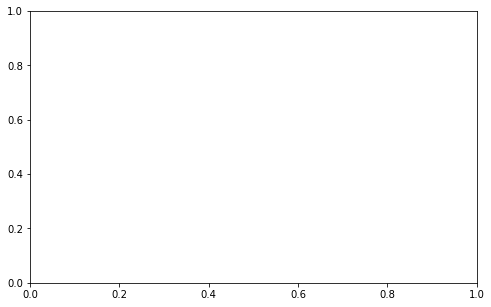

In [31]:
UE_idx   = [ij[0] for ij in UEs] #[1,2,3,4,5,6,8,17,18]
UE_names = [ij[1].strip("()?") for ij in UEs] #['Profession?', 'Permanent?', 'Site?', 'Climaction?','Stratégie?','Quel objectif?',
            #'Individuel ou collectif?','Calculateur?','Influence recherche?'].replace('(','').replace(')','')

print(UE_idx,UE_names)
#colors2 = ['red', 'blue']
#a       = np.random.random(4)
#cs      = cm.Set1(np.arange(4)/4.)

keys1 = ['Oui','Non']
keys2 = ['Tout à fait d\'accord','Plutôt d\'accord','Plutôt pas d\'accord','Pas du tout d\'accord']

# Changing key for specific question
Idx_change = [9]
tabword = ['cohérence','lien entre']
keys3 = ['Bonne','Plutôt bonne','Plutôt mauvaise','Mauvaise']

# Changing answers for specific question
UE_change  = ['LU2ST034','LU2ST303','LU2ST352','LU2ST044','LU2ST402','LU3ST603','LU3ST602']
keys4 = ['Très clair','Assez clair','Assez flou','Très flou']

# Changing answers for S1
tabword2 = ['capsules']
keys5 = ['Oui, beaucoup (> 10 vidéos)','Oui, certaines (5-10 vidéos)',\
'Quelques unes (1-4 vidéos)','Non, mais je sais qu\'elles existaient',\
'Non, car je ne savais pas qu\'il y avait des capsules vidéos de soutien']
tabword3 = ['Ces vidéos']
keys6 = ['Oui, le plus souvent','Oui, certaines',\
         'Non, même si je les ai visionnées','Non, car pas visionnées']

# Changing answers for S6
tabword4 = ['Vous sentez-vous','lien existant entre disciplines']
keys7 = ['Oui','Pas d\'avis','Non']

tabword5 = ['davantage de TP']
keys8 = ['Davantage de TD et exercices “sur papier” encadrés',\
         'Je ne changerais rien',\
         'Davantage de TP en salle informatique',\
        ]

# Changing answers for S5 (OIP)
tabword6 = ['avenir professionnel']
keys9 = ['Utile','Pas d\'avis particulier', 'Pas utile']

#keys6 = ['Oui, beaucoup (> 10 vidéos)','Oui, certaines (5-10 vidéos)',\
#'Quelques unes (1-4 vidéos)','Non, mais je sais qu\'elles existaient',\
#'Non, car je ne savais pas qu\'il y avait des capsules vidéos de soutien']

print(tabword)
#c1 = '#1f77b4' #blue
#c2 = 'red' #green
#colors2 = [colorFader(c1,c2,x/2)for x in range(2)]
#colors4 = [colorFader(c1,c2,x/4)for x in range(4)]

# 12 questions !
Nb_questions = 18 #(UE_idx[1]-UE_idx[0])-1
if Semestre == 1:
    Nb_questions = 19
if Semestre == 6:
    Nb_questions = 13
print(Nb_questions)

figsize = (8, 5)

#UE_idx=[UE_idx[ij] for ij in range(len(UE_idx)) if UE_names[ij]=='LU2ST045']
#print(UE_idx)

for ij,idx in enumerate(UE_idx):
    UE = UE_names[ij]
    print('UE : ',UE)
    
    path_file = pathfig+UE+'/'
    print(path_file)
    _mkdir(path_file)
    
    for ik in range(Nb_questions):
      fig, ax = plt.subplots(1,figsize=figsize)

      data = df[questions[idx+ik]]
       
      #data = data.replace('’','\'')
      data = data.replace('Tout à fait d’accord','Tout à fait d\'accord')
      data = data.replace('Plutôt pas d’accord','Plutôt pas d\'accord')
      #data = data.replace('d’accord','d\'accord')
      data = data.replace('è','\'e')
      #data = data.replace('Très','Tr\'es')
      print(ik,data)
      data = data.value_counts() #normalize=True) 
                
      #colors = colors2 ; 
      changecolor = 0
      keys = keys1
      if ('Oui' in data.keys()):
        keys = keys1
      else:
        keys = keys2
        #if ik in Idx_change:
        if any([ii in questions[idx+ik] for ii in tabword]):
        #if 'cohérence' in questions[idx+ik]:
            keys = keys3
            if UE in UE_change:
                keys = keys4
        elif any([ii in questions[idx+ik] for ii in tabword2]):
            keys = keys5
        elif any([ii in questions[idx+ik] for ii in tabword3]):
            keys = keys6
      if any([ii in questions[idx+ik] for ii in tabword4]):
            keys = keys7
      if any([ii in questions[idx+ik] for ii in tabword5]):
            keys = keys8
      if any([ii in questions[idx+ik] for ii in tabword6]):
            keys = keys9
      print(UE,idx,keys,data.index)
    
      cmap = plt.cm.bwr
      colors = cmap(np.linspace(0., 0.95, len(keys)))
      #if changecolor:
      #    colors = colors_save 
  
          
    
      gcolors=dict()
      for ij,key in enumerate(keys):
        gcolors[key]=colors[ij]
      labels = [ij for ij in gcolors if ij in data.index]
      data   = data.reindex(labels)
      print(labels)
        
      wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
                                            ,colors=[gcolors[i] for i in data.index]\
                                            ,textprops=dict(color="w") #, colors=color
                                            ,startangle=0)
    
      ax.legend(wedges, data.index,loc="best",bbox_to_anchor=(1, 1, 0.5, -0.5))
      plt.setp(autotexts, size=10, weight="bold")
    
      title = questions[idx+ik].split('.')[0]
      ax.set_title(title)
      print(title)
    
      name_file = 'Question_'+str(ik)
      name_file = path_file + name_file
      print(name_file)
      _savefig(fig,ax,title=title,name=name_file,xsize=figsize)


